# Does money buy happiness?

Student names: Thijs Slagter, Bibi de Marez Oyens, Tom de Lange, Dario Madau

Team number: C1

In [1]:
# Display image from URL with smaller size and subtitle
from IPython.display import Image, display

# Load image from link
url = 'images/960x0.png'

# Set the desired image width and height
width = 600
height = 400

# Set the subtitle text
subtitle = "© Forbes - John Jennings"

# Create an Image instance with the URL
image = Image(url=url, width=width, height=height)

# Display the image and subtitle
display(image)
print(subtitle)

© Forbes - John Jennings


For centuries, philosophers, theologians, and everyday people have pondered the age-old question: can money buy happiness? The answer, as with most things in life, is not a simple yes or no. While financial security undoubtedly plays a role in well-being, the relationship between money and happiness is complex and multifaceted.

On one side of the spectrum, individuals grounded in practicality argue that financial security is a fundamental building block for a happy life (Diener & Biswas-Diener, 2002). They point out that basic necessities like food, shelter, and healthcare are essential for survival and overall well-being. 

However, others posit that true happiness transcends material wealth (Aknin, Norton & Dunn, 2009). Proponents of this perspective emphasize the importance of intrinsic factors like strong social connections, meaningful relationships, and a sense of purpose (Frey & Stutzer, 2000). They argue that focusing solely on acquiring material wealth can lead to feelings of emptiness and dissatisfaction. 

To delve deeper into this complex question, we embark on a data-driven exploration. We will analyze economic and demographic data from various countries, exploring the correlation between "money" (meaning overall economic well-being) and national/individual happiness. By harnessing scientific research and statistical analysis, this project aims to shed light on whether financial prosperity paves the way for a happier world. 

## Dataset and Preprocessing

Before the first meeting took place, all participants of our group looked for an interesting subject for this project and at least two corresponding, adequate datasets that could help build two opposite perspectives on their found topic. 
After some debate about what topic would be most suiting to inspect, we ultimately ended up with a dataset called [World Happiness Report](https://www.kaggle.com/datasets/unsdsn/world-happiness) and [Global Country Information Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023 ) which were found on Kaggle.com. The be more specific, the World Happiness Report dataset was a collection of databases from 2015 up to 2020. 
After some research on Kaggle.com, we also found [datasets](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023) containing the World Happiness Scores from later years and we aggregated these all into one dataset, that we fittinly named [merged_dataset.csv](/Documents/InfVis/Draft/data-storyV2/docs/databases/merged_dataset2.csv). 

The Global Country Information Dataset offers detailed information about countries worldwide. It includes demographic statistics, economic metrics, environmental data, healthcare figures, education statistics, and more. With a representation from every country, the dataset provides a comprehensive global view, allowing for in-depth analyses and comparisons across nations. The data has been obtained from multiple sources.

The datasets on World Happiness Scores all contained reported World Happiness Scores per country and possible, contributing factors to these happiness scores, such as life expectancy, birthrate and GDP per capita. With the possible correlations between these factors and happiness scores in both the Global Country Information Dataset and the World Happiness Report Datasets, we thought it would be interesting to discover what factors most influenced the happiness of a people and with analyzing these factors we tried to answer the ageold question: 'Does money buy happiness?'.

## Data cleaning

Since we wanted to aggregate the datasets from the years 2015 to 2020 into the Global Country Information Database 2023, based on country name, we had to ensure all columns containing the countries had the same name. We also had to correct a small discrepancy between country names in the different datasets, so they would be equal in every dataset and aggregation would be possible. 

To be able to differentiate between the multiple happiness score-columns, we labeled each column with the correct year.

5 Rows had inefficient or too little data have on Happiness scores, so those rows were deleted. We eventually ended up with 189 countries still remaining.


## Variable Desprictions

Merged_dataset2.csv is a rather big dataset, so we will show you and classify only the important variables.

- Categorical/Nominal: Country names
- Continuous/Ratio: Life expectancy, Birthrate, Infant mortality, Minimum wage, Gross tertiary education enrollment (%), \
Fertility rate, Maternal mortality ratio, Physicians per thousand, Out-of-pocket health expenditure, Latitude, Gasoline price,\
 Tax revenue (%), Agricultural land, CPI (Consumer Price Index), CPI change, Unemployment rate, Longitude, Forested area (%), GDP, \
GDP per capita, Social support
- Ordinal: World Happiness Score


## First Perspective

Economic welfare is the most important for the overall happiness of a country and its citizens. To experience happiness, you must have basic facilities and a minimum wage to live in today's society.



### Argument 1

Economic welfare is important for the overall happiness of a country and its citizens. Things like minimum wage and access to important facilities like healthcare correlate with more happiness.

In [14]:
import plotly.express as px
import pandas as pd

# Laad de dataset
data = pd.read_csv('databases/merged_dataset2_updated.csv')

# Voorbeeld structuur van de oorspronkelijke dataset:
# Country, iso_a3, Happiness Score 2019, Happiness Score 2020, Happiness Score 2021
# Afghanistan, AFG, 3.2, 3.4, 3.5

# Zet de dataset om naar lange vorm
data_long = pd.melt(
    data,
    id_vars=['Country', 'iso_a3'],
    value_vars=['Happiness Score 2020','Happiness Score 2019', 'Happiness Score 2018', 'Happiness Score 2017','Happiness Score 2016',
                'Happiness Score 2015'],
    var_name='Year',
    value_name='Happiness Score'
)

# Extract jaar uit de variabelenaam
data_long['Year'] = data_long['Year'].str.extract('(\d+)').astype(int)


# Maak een choropleth-kaart met een slider voor jaren
fig = px.choropleth(
    data_long,
    locations='iso_a3',  # Gebruik de kolom met ISO 3166-1 alpha-3 landcodes
    color='Happiness Score',  # Gebruik de 'Happiness Score' kolom om kleuren te bepalen
    hover_name='Country',  # Toon de landnamen bij hover
    animation_frame='Year',  # Gebruik de 'Year' kolom voor de animatie
    color_continuous_scale=px.colors.sequential.Plasma,  # Kleurschaal
    title='Happiness Around the World Over multiple Years'
)


fig.show()

> *Figure 1: Happiness Around the World Over multiple Years.*

In [13]:
import plotly.express as px
import pandas as pd
import numpy as np

# Laad de dataset
data = pd.read_csv('databases/merged_dataset2_updated.csv')

# Verwijder speciale tekens en converteer de GDP kolom naar numerieke waarden
data['Logged GDP per capita'] = data['Logged GDP per capita'].replace('[\$,]', '', regex=True).astype(float)

# Maak een choropleth-kaart voor de geschaalde logaritmische GDP
fig = px.choropleth(
    data,
    locations='iso_a3',  # Gebruik de kolom met ISO 3166-1 alpha-3 landcodes
    color='Logged GDP per capita',  # Gebruik de geschaalde logaritmische 'GDP' kolom om kleuren te bepalen
    hover_name='Country',  # Toon de landnamen bij hover
    color_continuous_scale=px.colors.sequential.Plasma,  # Kleurschaal
    title='Scaled Logarithmic GDP per capita Around the World'
)



fig.show()

> *Figure 2: Scaled Logarithmic GDP per capita Around the World.*

On the first map-graph we can see the happiness in most countries from 2020 till 2015, where the more yellow a country is, the more happy the people in the country are. On the second map-graph we can see how wealthy a country is divided by how many people live in that country. If you compare both maps you will see that most often, the more wealthy per person a country is, that more happiness is perceived in that country.

In [12]:
import plotly.graph_objs as go
import pandas as pd

# Load the correlation data
df = pd.read_csv('databases/score_correlations.csv')

# Create the bar trace
trace = go.Bar(
    x = df['Variable1'],
    y = df['Correlation']
)

# Create the figure and update layout with titles
fig = go.Figure(trace)
fig.update_layout(
    title='Correlations with Happiness in a country in 2020',
    yaxis_title='Correlation with Happiness',
    xaxis_title='Different properties of a country',
        xaxis=dict(
        showgrid=True,  # Add grid lines to x-axis
        gridwidth=1,
        gridcolor='LightGrey'
    ),
    yaxis=dict(
        showgrid=True,  # Add grid lines to y-axis
        gridwidth=1,
        gridcolor='LightGrey'
    ),

)

# Display the figure
fig.show()


> *Figure 3: Correlations with Happiness in a country in 2020.*

This graph shows the correlations between different statistics of a country and how happy people are in that country. As you can see in this graph: logged GDP per capita, has the highest correlation with happiness. Which leads to a conclusion that wealth does give the most happiness. 

In [5]:
import pandas as pd
import plotly.express as px
import numpy as np

# Load the dataset
file_path = 'databases/merged_dataset2_updated.csv'
data = pd.read_csv(file_path)

# Calculate the correlation between Ladder score and Logged GDP per capita
correlation = data['Happiness Score 2020'].corr(data['Logged GDP per capita'])

# Calculate the mean GDP per capita and happiness score
mean_gdp = np.mean(data['Logged GDP per capita'])
mean_score = np.mean(data['Happiness Score 2020'])

# Create a scatter plot with tooltips and a mean line
fig = px.scatter(data, x='Logged GDP per capita', y='Happiness Score 2020', hover_name='Country',
                 title=f'<b>Correlation between GDP per capita and Happiness Score</b> (Correlation: {correlation:.2f})',
                 trendline='ols')  # Ordinary Least Squares (OLS) trendline for mean

# Update layout for aesthetics
fig.update_layout(
    title_x=0.5,  # Center title
    title_font_size=18,  # Increase title font size
    yaxis_title='Happiness Score',  # Label y-axis
    showlegend=False  # Hide legend for cleaner look
)

# Show the plot
fig.show()

> *Figure 4: Correlation between GDP per capita and Happiness Score.*

In this graph the correlation between GDP per capita and Happiness is shown in more detail. The data points, representing countries, show a consistent trend along the upward sloping line. This consistency suggests that the relationship between GDP per capita and happiness is relatively stable across different countries. Most countries follow the general trend, with fewer outliers, which highlights that higher GDP per capita is generally associated with higher happiness scores.


## Second Perspective

Economic welfare is not the most important for the overall happiness of a country and its citizens. To experience happiness, you need to be socially satisfied.

To find out if there is a big correlation between social factors and happiness, we compared it with the correlation between GDP per capita and happiness. This is important to show the relevence of this second perspective.

In [6]:
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr
from plotly.subplots import make_subplots

# Load the dataset
df = pd.read_csv('databases/merged_dataset2_updated.csv')

# Extract relevant columns
df = df[['Country', 'Logged GDP per capita', 'Social support', 'Happiness Score 2020']]

# Convert to numeric, handling errors if any
df['Logged GDP per capita'] = pd.to_numeric(df['Logged GDP per capita'], errors='coerce')
df['Social support'] = pd.to_numeric(df['Social support'], errors='coerce')
df['Happiness Score 2020'] = pd.to_numeric(df['Happiness Score 2020'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Compute correlation coefficients
corr_social_support, _ = pearsonr(df['Social support'], df['Happiness Score 2020'])
corr_gdp, _ = pearsonr(df['Logged GDP per capita'], df['Happiness Score 2020'])

# Create interactive scatter plot for Social Support vs Happiness Score
fig1 = px.scatter(df, x='Social support', y='Happiness Score 2020', 
                  title='Social Support vs Happiness Score 2020',
                  labels={'Social support': 'Social support', 'Happiness Score 2020': 'Happiness Score 2020'},
                  hover_name='Country', hover_data={'Happiness Score 2020': ':.2f', 'Social support': ':.2f'})

fig1.update_traces(marker=dict(color='blue'))


# Create interactive scatter plot for Logged GDP per capita vs Happiness Score
fig2 = px.scatter(df, x='Logged GDP per capita', y='Happiness Score 2020', 
                  title='Logged GDP per capita vs Happiness Score 2020',
                  labels={'Logged GDP per capita': 'Logged GDP per capita', 'Happiness Score 2020': 'Happiness Score 2020'},
                  hover_name='Country', hover_data={'Happiness Score 2020': ':.2f', 'Logged GDP per capita': ':.2f'})

fig2.update_traces(marker=dict(color='green'))


# Combine the two figures into a single plot
combined_fig = make_subplots(rows=1, cols=2, subplot_titles=("Social Support vs Happiness Score", "GDP per capita vs Happiness Score"))
for trace in fig1.data:
    combined_fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    combined_fig.add_trace(trace, row=1, col=2)

# Update x-axis and y-axis titles for each subplot
combined_fig.update_xaxes(title_text="Social Support", row=1, col=1)
combined_fig.update_yaxes(title_text="Happiness Score", row=1, col=1)
combined_fig.update_xaxes(title_text="GDP per capita", row=1, col=2)
combined_fig.update_yaxes(title_text="Happiness Score", row=1, col=2)

# Calculate relative position for annotations
x_annotation1 = 0.95 # Adjust as needed
x_annotation2 = 11.3  # Adjust as needed
y_annotation = 1.05   # Adjust as needed

# Calculate relative font size
font_size = 20  # Adjust as needed

# Add textbox annotations at the top center of each subplot
combined_fig.add_annotation(
    text=f'Correlation: {corr_social_support:.2f}',
    xref='paper', yref='paper',
    x=x_annotation1, y=y_annotation,
    showarrow=False,
    font=dict(size=font_size, color='black'),
    align='left', bgcolor='rgba(255, 255, 255, 0.5)',
    row=1, col=1
)

combined_fig.add_annotation(
    text=f'Correlation: {corr_gdp:.2f}',
    xref='paper', yref='paper',
    x=x_annotation2, y=y_annotation,
    showarrow=False,
    font=dict(size=font_size, color='black'),
    align='left', bgcolor='rgba(255, 255, 255, 0.5)',
    row=1, col=2
)


# Update layout with centered and larger title
combined_fig.update_layout(
    title_text='Impact of Social Support and GDP per capita on Happiness in 2020',
    title_x=0.5,  # Center title horizontally
    title_y=0.95,  # Position title slightly above the plots
    title_font=dict(size=20),  # Increase font size
    showlegend=False
)
# Show the combined figure
combined_fig.show()


> *Figure 5: The impact of social support and GDP per capita on the happiness score in 2020.*

This graph presents a detailed comparison of the two most highly correlated statistics with happiness. The first plot displays all the data points (countries) between social support and happiness score, while the second plot shows the data points between GDP per capita and happiness score. The visibility of all data points allows us to observe the trends clearly.
In the comparison, we notice that the data points between social support and happiness score cluster closely together at the top right, illustrating an exponential trend. This indicates that as social support increases, happiness scores rise significantly, highlighting the profound impact of strong social networks on well-being.
On the other hand, the data points between GDP per capita and happiness score exhibit more consistency and a linear trend. GDP per capita reflects material wealth and access to resources, which undoubtedly contribute to overall life satisfaction. However, the linear trend suggests that while economic wealth is important, it does not fully capture the complexity of happiness. Economic gains may lead to improvements in living standards, healthcare, and education, but these gains tend to follow a more uniform pattern, lacking the exponential impact observed with social support.


### Argument 1

GDP per capita represents an average of the economic output per person within a country. However, it provides little insight into how this prosperity is distributed across the population. High GDP per capita can coexist with significant income inequality, where a small elite earns considerably more than the majority of the population. This disparity can lead to social tensions, feelings of injustice, and a reduced sense of well-being among a large segment of the population, despite a high average income. Consequently, this scenario often results in lower levels of happiness.

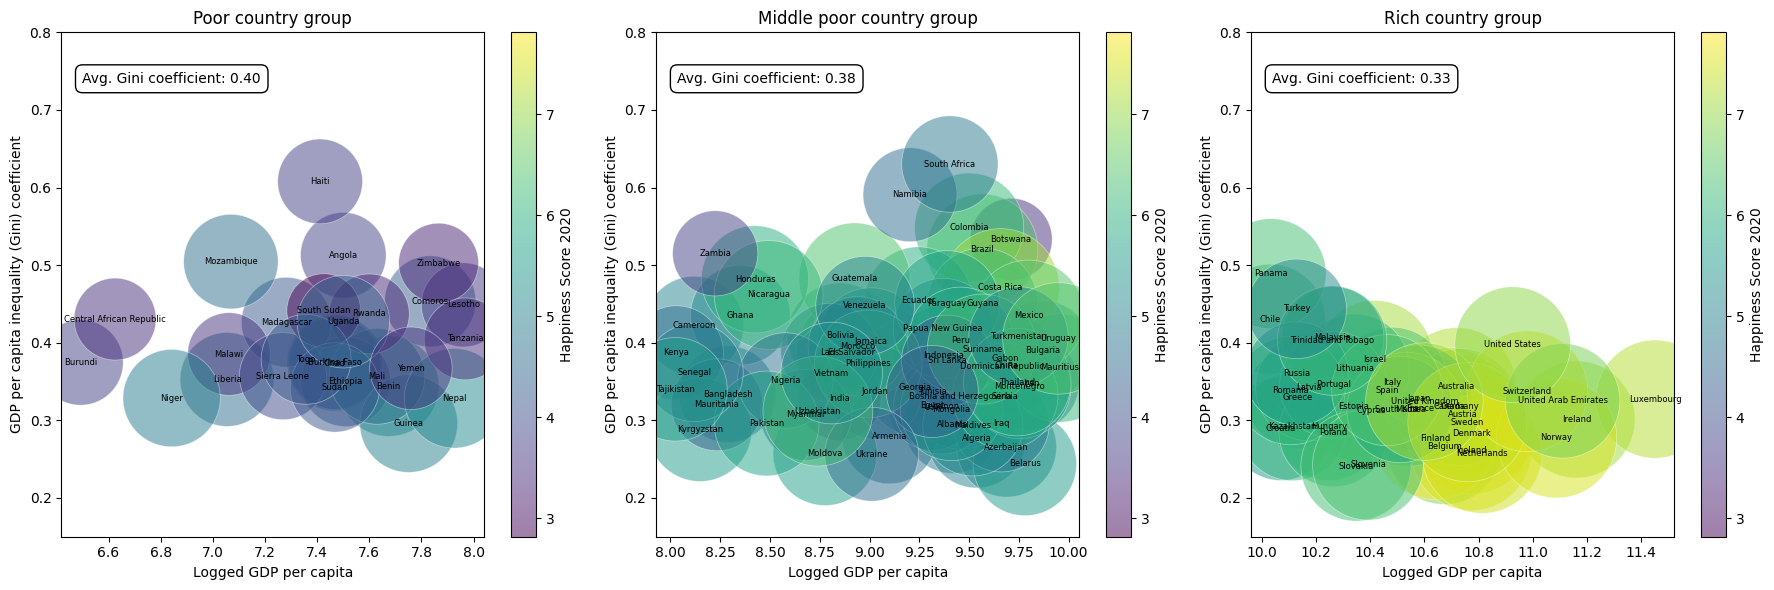

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'databases/merged_dataset2_updated.csv'
df = pd.read_csv(file_path)

# Define thresholds for GDP per capita to classify countries into three groups
gdp_thresholds = [8, 10]

# Define group labels
poor_group = 'Poor: GDP per capita < {}'.format(gdp_thresholds[0])
middle_group = 'Middle: {} <= GDP per capita < {}'.format(gdp_thresholds[0], gdp_thresholds[1])
rich_group = 'Rich: GDP per capita >= {}'.format(gdp_thresholds[1])

# Function to categorize GDP per capita into three groups
def categorize_gdp(gdp):
    if gdp < gdp_thresholds[0]:
        return poor_group
    elif gdp < gdp_thresholds[1]:
        return middle_group
    else:
        return rich_group

# Apply categorization to create a new column 'GDP Group'
df['GDP Group'] = df['Logged GDP per capita'].apply(categorize_gdp)

# Filter out rows where 'Logged GDP per capita' or 'Gini coefficient' are NaN or Inf
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Logged GDP per capita', 'Gini coefficient'])

# Split data into three groups based on GDP Group
group_poor = df[df['GDP Group'] == poor_group]
group_middle = df[df['GDP Group'] == middle_group]
group_rich = df[df['GDP Group'] == rich_group]

# Calculate the range of happiness scores and Gini coefficients for consistent scaling
min_happiness = df['Happiness Score 2020'].min()
max_happiness = df['Happiness Score 2020'].max()

# Create a function to plot each group with average Gini annotation
def plot_group(ax, df, title):
    # Define bubble sizes based on happiness score (multiplied for better visualization)
    bubble_sizes = df['Happiness Score 2020'] * 1000

    # Scatter plot with bubble size encoding
    scatter = ax.scatter(df['Logged GDP per capita'], 
                         df['Gini coefficient'], 
                         s=bubble_sizes,
                         alpha=0.5,  # transparency
                         c=df['Happiness Score 2020'],  # color map based on happiness score
                         cmap='viridis',  # colormap
                         edgecolors='w',  # edge color of bubbles
                         linewidths=0.5,  # linewidth of bubble edge
                         vmin=min_happiness,  # set minimum of color scale
                         vmax=max_happiness)  # set maximum of color scale

    # Add labels with adjusted size and centered in the bubbles
    for i, (country, x, y) in enumerate(zip(df['Country'], df['Logged GDP per capita'], df['Gini coefficient'])):
        ax.text(x, y, country, fontsize=6, ha='center', va='center')

    # Add average Gini coefficient annotation
    avg_gini = df['Gini coefficient'].mean()
    ax.annotate(f"Avg. Gini coefficient: {avg_gini:.2f}", 
                xy=(0.05, 0.9),
                xycoords='axes fraction',
                fontsize=10,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    # Add colorbar
    ax.figure.colorbar(scatter, ax=ax, label='Happiness Score 2020')

    # Set y-axis limits for Gini coefficient
    ax.set_ylim(0.15, 0.8)

    # Add labels and title
    ax.set_title(title)
    ax.set_xlabel('Logged GDP per capita')
    ax.set_ylabel('GDP per capita inequality (Gini) coefficient')

# Create a figure with three subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot each group in its own subplot
plot_group(axs[0], group_poor, title='Poor country group')
plot_group(axs[1], group_middle, title='Middle poor country group')
plot_group(axs[2], group_rich, title='Rich country group')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


> *Figure 6: The comparison of inequality with logged GDP per capita and their happiness for each country.*

This graph shows through a distribution of bubbels the correlation between GDP per capita and Happiness, and the effect the inequality (Gini) coefficient has on both. The Gini coefficient tells us how uneven wealth is distributed in a country. This graph is also split into three plots, poor, middle and rich groups, because of this we can clearly see that countries that are more poor are less happy and also have a higher uneven wealth distribution.


### Argument 2

Strong social connections, a sense of purpose, and positive emotions are key ingredients for happiness, especially for some GDP groups. Material wealth can't replace these intrinsic factors.

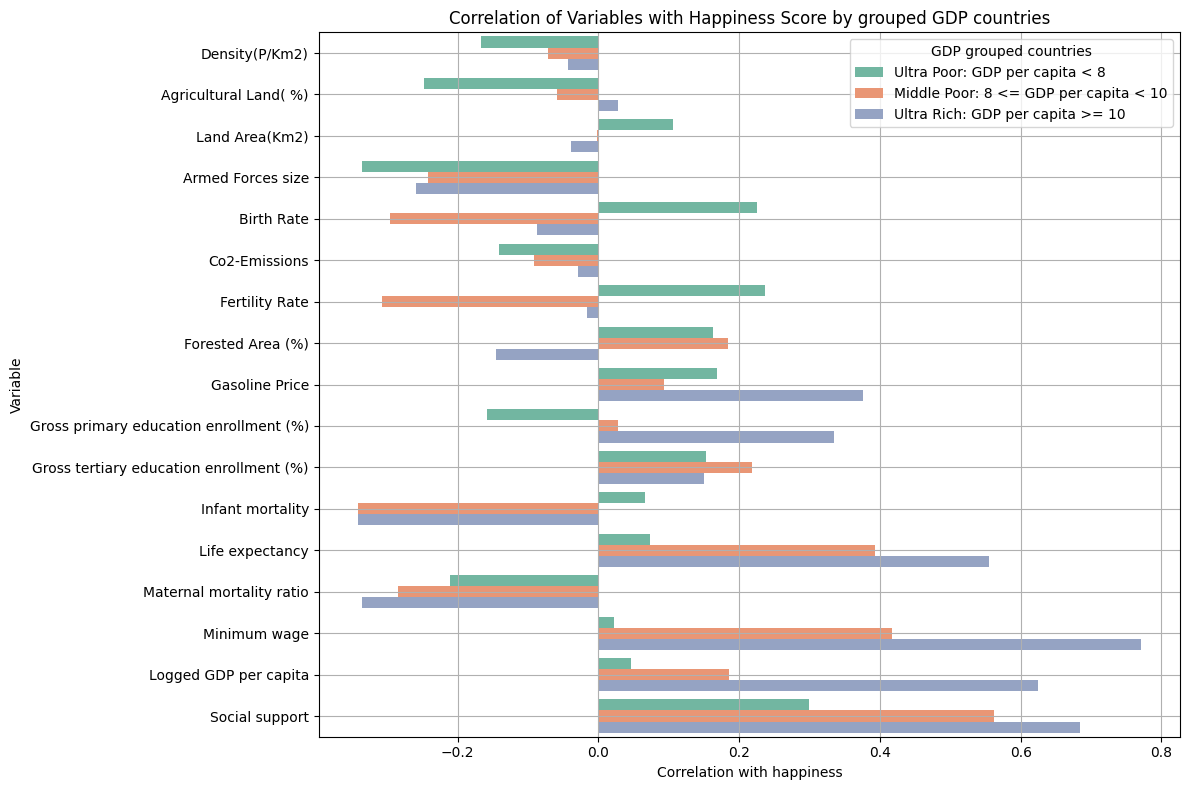

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
merged_data = pd.read_csv('databases/merged_dataset2_updated.csv')

# Define variables of interest for correlation analysis
variables = ['Density(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 
             'Birth Rate', 'Co2-Emissions', 
             'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 
             'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 
             'Infant mortality', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 
             'Logged GDP per capita', 'Social support']

# Function to preprocess columns with special characters and percentages
def preprocess_column(col):
    if merged_data[col].dtype == 'object':  # Only process columns with object dtype
        if '$' in merged_data[col].iloc[0]:  # Check if column contains '$'
            merged_data[col] = merged_data[col].replace('[\$,]', '', regex=True).astype(float)
        elif '%' in merged_data[col].iloc[0]:  # Check if column contains '%'
            merged_data[col] = merged_data[col].replace('%', '', regex=True).astype(float)
        else:
            merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Preprocess columns with special characters and percentages
for var in variables:
    preprocess_column(var)

# Filter out rows where Logged GDP per capita is NaN or missing
merged_data = merged_data.dropna(subset=['Logged GDP per capita'])

# Define thresholds for GDP per capita to classify countries into three groups
gdp_thresholds = [8, 10]  # Define your thresholds based on your criteria

poor_group = f'Ultra Poor: GDP per capita < {gdp_thresholds[0]}'
middle_group = f'Middle Poor: {gdp_thresholds[0]} <= GDP per capita < {gdp_thresholds[1]}'
rich_group = f'Ultra Rich: GDP per capita >= {gdp_thresholds[1]}'

# Function to categorize GDP per capita into three groups
def categorize_gdp(gdp):
    if gdp < gdp_thresholds[0]:
        return poor_group
    elif gdp < gdp_thresholds[1]:
        return middle_group
    else:
        return rich_group

# Apply the categorization function to create a new column 'GDP Group'
merged_data['GDP Group'] = merged_data['Logged GDP per capita'].apply(categorize_gdp)

# Compute correlations for each group and each variable
correlations = []

for group in [poor_group, middle_group, rich_group]:
    group_data = merged_data[merged_data['GDP Group'] == group]
    group_corr = []
    for var in variables:
        if var in group_data.columns:
            correlation = group_data['Happiness Score 2020'].corr(group_data[var])
            group_corr.append({'Variable': var, 'Correlation': correlation, 'Group': group})
    correlations.extend(group_corr)

# Convert correlations list to DataFrame
correlations_df = pd.DataFrame(correlations)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='Variable', hue='Group', data=correlations_df, palette='Set2')
plt.title('Correlation of Variables with Happiness Score by grouped GDP countries')
plt.xlabel('Correlation with happiness')
plt.ylabel('Variable')
plt.grid(True)
plt.legend(title='GDP grouped countries', loc='upper right')
plt.tight_layout()
plt.show()


> *Figure 7: Correlates all kinds of variables with the happiness score for 3 different kind of GDP country groups.*

In this graph just like the barchart are correlations between different statistics of a country and happiness shown, but now the statistics  are also grouped between poor, medium and rich countries. If you look carefully at this graph, you can see that economic statistics have a high correlation with happiness in rich countries, but in poor countries statistics like birth rate, social support and fertility rate have the highest correlation with happiness. This shows that money doesn't give the most happiness in every situation.

## References

- Aknin, L. B., Norton, M. I., & Dunn, E. W. (2009). Happiness by design: Interaction effects of valence and framing on gift-giving. Journal of Experimental Social Psychology, 45(4), 739-743. 
https://www.tandfonline.com/doi/full/10.1080/08870446.2019.1609677

- Diener, E., & Biswas-Diener, R. (2002). Subjective well-being: The science of happiness and a proposal for a national index. American Psychologist, 57(3), 227. 
https://psycnet.apa.org/record/2000-13324-004 

- Frey, B. S., & Stutzer, A. (2000). Happiness, economy and institutions. The Economic Journal, 110(466), 919-939. 
https://warwick.ac.uk/research/ref/stories/search-for-happiness/ 